# 作业一：回归任务

1.	数据集：使用California房价数据集。该数据集包含了加利福尼亚州的房屋特征和对应的房价，适合用于回归分析。

2.	数据集划分：选择留出法、交叉验证法、自助法其中之一来创建训练集和测试集。

3.	实现要求：

* 岭回归：
	* 手动实现，不要直接调用库。
	* 选择合适的参数，并比较不同参数对模型性能的影响。
	* 使用MSE、MAE、RMSE分析模型性能。
	* 可视化回归结果。
* 套索回归：
	* 手动实现，不要直接调用库。
	* 选择合适的参数，并比较不同参数对模型性能的影响。
	* 使用MSE、MAE、RMSE分析模型性能。
	* 可视化回归结果
* 结果分析：
	* 比较模型效果。

### 步骤 1：数据集加载与预处理

我们将使用`sklearn.datasets`中的`California housing dataset`，这是一个经典的回归任务数据集。首先，加载数据，并进行划分训练集和测试集。

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载加利福尼亚房价数据集
data = fetch_california_housing()
X = data.data
y = data.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 选择留出法: 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 步骤 2：手动实现岭回归

**岭回归**（Ridge Regression）是带有L2正则化的线性回归。目标是通过最小化以下损失函数来找到模型参数：

$$\text{Loss} = \|Xw - y\|^2 + \lambda \|w\|^2$$

其中，λ是正则化参数，控制着模型的复杂度。通过矩阵运算来手动实现岭回归。

#### 2.1 代码流程

首先，定义岭回归模型，通过闭式解计算回归系数，使用正则化参数λ来控制模型复杂度。然后，基于计算出的回归系数，定义了预测函数，并考虑了偏置项。接着，通过不同的λ值训练多个模型，计算每个模型在测试集上的MSE，并通过可视化λ值与MSE的关系图来观察正则化对模型性能的影响。选择最优的λ值后，重新训练模型并进行预测，评估其性能，计算MSE、MAE和RMSE等指标。最后，使用散点图展示实际值与预测值的对比，并绘制理想预测线，进一步直观地展示模型的预测效果。

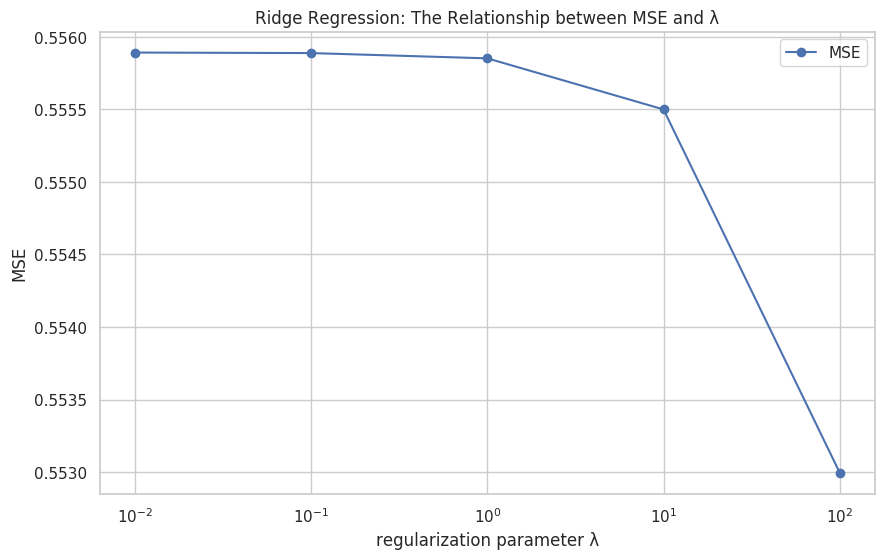

预测: 0.719472566208687, 实际: 0.477
预测: 1.7638457817744968, 实际: 0.458
预测: 2.7092844417283075, 实际: 5.00001
预测: 2.8387619126165213, 实际: 2.186
预测: 2.6041901579660016, 实际: 2.78
预测: 2.0119044245875504, 实际: 1.587
预测: 2.645540401633204, 实际: 1.982
预测: 2.168761890345965, 实际: 1.575
预测: 2.7401061724599343, 实际: 3.4
预测: 3.915744951273917, 实际: 4.466
MSE: 0.5558512007367513
MAE: 0.5331933646313115
RMSE: 0.7455542909384609


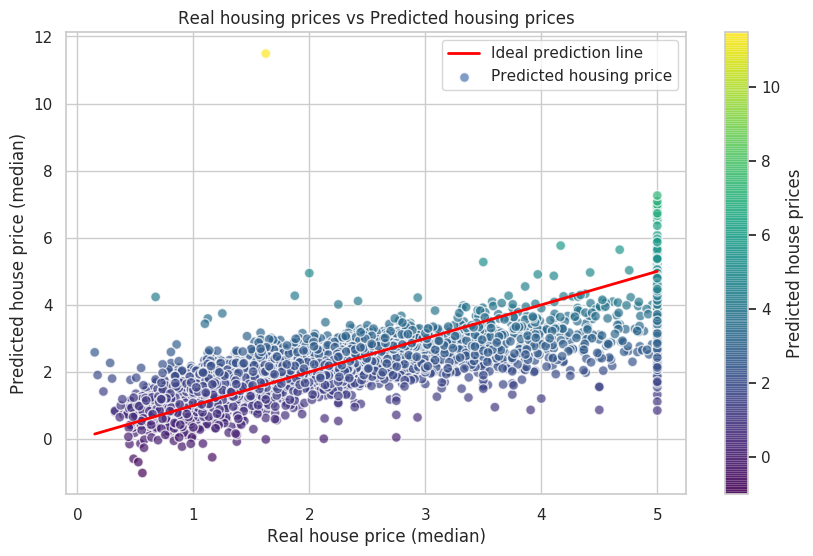

In [8]:
# 定义岭回归函数
def ridge_regression(X_train, y_train, lambda_):
    # 添加偏置项的列向量
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    I = np.eye(X_train.shape[1])
    I[0, 0] = 0  # 不对偏置项进行正则化

    # 岭回归的闭式解
    w = np.linalg.inv(X_train.T.dot(X_train) + lambda_ * I).dot(X_train.T).dot(y_train)
    return w

# 定义预测函数
def predict(X, w):
    X = np.c_[np.ones(X.shape[0]), X]  # 添加偏置项
    return X.dot(w)

# 设置lambda值范围
lambda_values = [0.01, 0.1, 1, 10, 100]
ridge_mse = []

# 训练并计算不同lambda值下的MSE
for lambda_ in lambda_values:
    w_ridge = ridge_regression(X_train, y_train, lambda_)
    y_pred = predict(X_test, w_ridge)
    mse = np.mean((y_pred - y_test) ** 2)
    ridge_mse.append(mse)

# 设置Seaborn的主题
sns.set(style="whitegrid")  # 使用干净的网格背景

# 可视化不同lambda下的MSE
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, ridge_mse, marker='o', label="MSE")
plt.xscale('log')
plt.xlabel('regularization parameter λ')
plt.ylabel('MSE')
plt.title('Ridge Regression: The Relationship between MSE and λ')
plt.grid(True)
plt.legend()
plt.show()

# 选择一个合适的lambda值进行预测
best_lambda = 1  # 可根据MSE最小值选择
w_best = ridge_regression(X_train, y_train, best_lambda)
y_pred = predict(X_test, w_best)

# 打印前10个预测结果和实际值
for i in range(10):
    print(f"预测: {y_pred[i]}, 实际: {y_test[i]}")

# 计算MSE、MAE、RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# 可视化实际房价与预测房价的对比
plt.figure(figsize=(10, 6))

# 创建一个渐变色的散点图，使用`c`参数根据预测值设定颜色
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis', alpha=0.7, edgecolors='w', s=50, label='Predicted housing price')

# 设置x轴标签
plt.xlabel('Real house price (median)')

# 设置y轴标签
plt.ylabel('Predicted house price (median)')

# 设置图表标题
plt.title('Real housing prices vs Predicted housing prices')

# 添加参考线，用于显示理想预测效果的对比
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal prediction line')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 添加颜色条以显示颜色映射
plt.colorbar(scatter, label='Predicted house prices')

# 显示图表
plt.show()


### 步骤 3：手动实现套索回归

**套索回归**是带有L1正则化的线性回归，其目标是最小化：

$$\text{Loss} = \|Xw - y\|^2 + \lambda \|w\|_1$$

L1正则化具有特征选择的效果，可以使一些特征的权重变为零。套索回归的实现可以使用坐标下降法来求解。
#### 3.1 代码流程
首先，定义一个`LassoRegression`类，包含了初始化、训练（`fit`方法）和预测（`predict`方法）。在初始化方法中，设置了学习率、迭代次数和L1正则化参数λ。`fit`方法通过梯度下降法训练模型，计算预测值并根据损失函数的梯度更新权重和偏置。`predict`方法则利用训练得到的模型参数进行预测。接着，加载了加利福尼亚房价数据集，并对数据进行了标准化处理。数据被划分为训练集和测试集，并转换为Paddle张量以适应Paddle框架。通过训练Lasso回归模型并在测试集上进行预测，使用MSE、MAE和RMSE等指标评估模型的性能。最后，通过绘制实际房价与预测房价的散点图，直观展示模型预测效果，同时添加了理想预测线、图例、网格和颜色条以增强可视化效果。

预测: 1.0368359088897705, 实际: 0.477
预测: 1.6286870241165161, 实际: 0.458
预测: 2.239549160003662, 实际: 5.00001
预测: 2.7553160190582275, 实际: 2.186
预测: 2.259214401245117, 实际: 2.78
预测: 2.177269697189331, 实际: 1.587
预测: 2.6592164039611816, 实际: 1.982
预测: 2.147073268890381, 实际: 1.575
预测: 2.2642035484313965, 实际: 3.4
预测: 3.9033584594726562, 实际: 4.466
MSE: 0.6018709572601609
MAE: 0.5736777500159611
RMSE: 0.7758034269453576


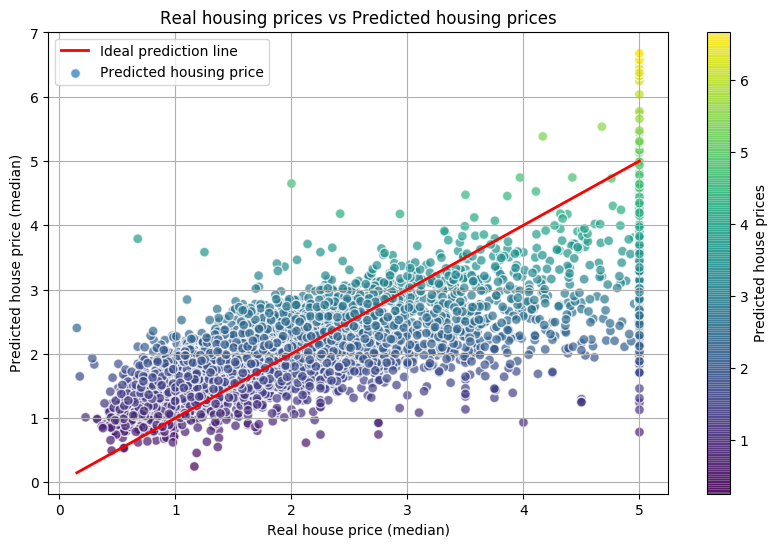

In [3]:
# Lasso回归模型类
class LassoRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_param=1.0):
        self.learning_rate = learning_rate  # 学习率
        self.epochs = epochs  # 迭代次数
        self.lambda_param = lambda_param  # L1正则化参数
        self.weights = None  # 权重参数
        self.bias = 0  # 偏置
    
    # 训练Lasso回归模型
    def fit(self, X, y):
        # 获取数据的样本数和特征数
        n_samples, n_features = X.shape
        # 初始化权重参数为零，形状为(n_features, 1)
        self.weights = paddle.randn([n_features, 1], dtype='float32')
        
        # 训练过程中进行多次迭代
        for epoch in range(self.epochs):
            # 预测值：使用当前的权重和偏置进行预测
            y_pred = paddle.matmul(X, self.weights) + self.bias
            # 计算梯度
            dw = (-2 / n_samples) * paddle.matmul(X.T, (y - y_pred)) + self.lambda_param * paddle.sign(self.weights)
            # 计算偏置梯度
            db = (-2 / n_samples) * paddle.sum(y - y_pred)
            # 使用梯度更新权重和偏置
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # 使用训练好的模型进行预测
    def predict(self, X):
        return paddle.matmul(X, self.weights) + self.bias  # 返回预测结果

# 加载加利福尼亚房价数据集
data = fetch_california_housing()
X = data.data
y = data.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 转换数据为Paddle张量
X_train_paddle = paddle.to_tensor(X_train, dtype='float32')
X_test_paddle = paddle.to_tensor(X_test, dtype='float32')
y_train_paddle = paddle.to_tensor(y_train, dtype='float32').reshape([-1, 1])
y_test_paddle = paddle.to_tensor(y_test, dtype='float32').reshape([-1, 1])

# 创建Lasso回归模型实例
lasso = LassoRegression(learning_rate=0.01, epochs=1000, lambda_param=0.1)

# 训练Lasso回归模型
lasso.fit(X_train_paddle, y_train_paddle)

# 在测试集上进行预测
y_pred_paddle = lasso.predict(X_test_paddle)

# 转换预测结果为numpy数组
y_pred = y_pred_paddle.numpy().flatten()

# 打印前10个预测结果和实际值
for i in range(10):
    print(f"预测: {y_pred[i]}, 实际: {y_test[i]}")

# 计算MSE、MAE、RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# 可视化实际房价与预测房价的对比
plt.figure(figsize=(10, 6))

# 创建一个渐变色的散点图，使用`c`参数根据预测值设定颜色
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis', alpha=0.7, edgecolors='w', s=50, label='Predicted housing price')

# 设置x轴标签
plt.xlabel('Real house price (median)')

# 设置y轴标签
plt.ylabel('Predicted house price (median)')

# 设置图表标题
plt.title('Real housing prices vs Predicted housing prices')

# 添加参考线，用于显示理想预测效果的对比
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal prediction line')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 添加颜色条以显示颜色映射
plt.colorbar(scatter, label='Predicted house prices')

# 显示图表
plt.show()
